<hr>

*PART II: Data Analysis* 

<a id='model_eval'></a>
# Baseline Models and Evaluation

A baseline model is developed here to set a benchmark for classification performance. The evaluation framework focused on accuracy, precision, recall, and F1 score metrics to assess the model's effectiveness in correctly classifying the leaf images. Initial results indicated promising classification capabilities, with specific attention paid to minimizing false negatives to avoid missed detections of diseased or infested leaves.


### Import Libraries

In [2]:
## IMPORT LIBRARIES ##

import numpy as np #numpy for 

import pandas as pd # pandas

from matplotlib import pyplot as plt # matplot library
import seaborn as sns

In [3]:
## IMPORT LIBRARIES ##

import os  
from matplotlib import image as mpimg
from random import randint
from PIL import Image
from skimage import io, img_as_float, img_as_ubyte
from skimage.io import imread, imshow
import cv2
from glob import glob
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

##########

### Load dataset

In [4]:
## Load the image directories ##

dir = '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset' # paste your folder directory

# returns a list containing the names of the images in the `healthy` folder
training_healthy_data= os.listdir(dir + '/training/healthy') # training dataset
testing_healthy_data = os.listdir(dir + '/training/healthy') # testing dataset

# returns a list containing the names of the images in the `aculus olearius` folder
training_aculus_data= os.listdir(dir + '/training/aculus_olearius') # training dataset 
testing_aculus_data = os.listdir(dir + '/training/aculus_olearius') # testing dataset

# returns a list containing the names of the images in the `peacock spot` folder
training_peacock_data= os.listdir(dir + '/training/peacock_spot') # training dataset 
testing_peacock_data = os.listdir(dir + '/training/peacock_spot/') # testing dataset

#all_data = [healthy_data, aculus_olearius_data, peacock_disease_data]

Now that the dataset has been successfully loaded from the corresponding directories, we can proceed with the preprocessing stage. 
<br><br>

### Define Dictionaries

In [5]:
training_dir = {
    'Healthy Leaves': os.path.join(dir, 'training/healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': os.path.join(dir, 'training/aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Spot Leaves': os.path.join(dir, 'training/peacock_spot') # Path to the directory containing images with Peacock Spot Leaves
}

testing_dir = {
    'Healthy Leaves': os.path.join(dir, 'testing/healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': os.path.join(dir, 'testing/aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Spot Leaves': os.path.join(dir, 'testing/peacock_spot') # Path to the directory containing images with Peacock Spot Leaves
}

training_data = {
    'Healthy Leaves': training_healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': training_aculus_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': training_peacock_data # Path to the directory containing images with Peacock Spot Leaves
}

testing_data = {
    'Healthy Leaves': testing_healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': testing_aculus_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': testing_peacock_data # Path to the directory containing images with Peacock Spot Leaves
}
##########

---

## Logistic Regression

(use more words to explain outline of what I'm doing)
The first model we will build is a Logistic Regression model as seen below: 

### Import Libraries

For a Logistic Regression model I will be importing the following libraries from `scikit-learn` library:

In [6]:
# Import Libraries

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

### Instantiate and Fit the Model

STEP 1:
Iterate through the different classes to :

In [21]:
# HEALTHY 
# create empty list for the concatenated counts - big list

healthy_big_list = []

for i in training_healthy_data:
    print("Working on: ", i, end="\r")
    try:
        img = mpimg.imread(dir + '/training/healthy/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    
    # loop through the 3 color channels
    for  channel in channels:
        
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins = np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
    
    # save the large array into the big list
    healthy_big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


In [22]:
# ACULUS OLEARIUS
# create empty list for the concatenated counts - big list

aculus_big_list = []

for i in training_aculus_data:
    print("Working on: ", i, end="\r")
    try:
        img = mpimg.imread(dir + '/training/aculus_olearius/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    # loop through the 3 color channels
    for  channel in channels:
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins=np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
        
    # save the large array into the big list
    aculus_big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


In [23]:
# PEACOCK DISEASE 
# create empty list for the concatenated counts - big list

peacock_big_list = []

for i in training_peacock_data:
    print("Working on: ", i, end = "\r")
    try:
        img = mpimg.imread(dir + '/training/peacock_spot/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    # loop through the 3 color channels
    for  channel in channels:
        
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins=np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
        
    # save the large array into the big list
    peacock_big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


STEP 2: Now to join the large array:

In [24]:
# JOIN THE LARGE ARRAY

healthy_hist = np.stack(healthy_big_list)
healthy_label = np.full(healthy_hist.shape[0], 0)

aculus_olearius_hist = np.stack(aculus_big_list)
aculus_olearius_label = np.full(aculus_olearius_hist.shape[0], 1)

peacock_disease_hist = np.stack(peacock_big_list)
peacock_disease_label = np.full(peacock_disease_hist.shape[0], 2)


In [25]:
# SANITY CHECK

display(healthy_label.shape, aculus_olearius_hist.shape, peacock_disease_hist.shape)

(830,)

(690, 150)

(1200, 150)

In [26]:
# Concatenate 

x = np.concatenate([healthy_hist, aculus_olearius_hist, peacock_disease_hist])
y = np.concatenate([healthy_label,aculus_olearius_label,peacock_disease_label])


# SANITY CHECK
x.shape,y.shape

((2720, 150), (2720,))

In [27]:
# Logistic Regression

model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

#### Model Evaluation

In [28]:
# Classification Report

report_initial = classification_report(y, model.predict(x))
print(report_initial)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       830
           1       0.70      0.66      0.68       690
           2       0.79      0.85      0.82      1200

    accuracy                           0.77      2720
   macro avg       0.76      0.75      0.75      2720
weighted avg       0.76      0.77      0.76      2720



The overall accuracy of the model is 0.77, meaning we correctly predicted the class 77% of the time across all instances.  

**Precision:**
- Class 0: Precision is 0.78, meaning that 78% of instances predicted as class 0 are actually class 0.  
- Class 1: Precision is 0.70, meaning that 70% of instances predicted as class 1 are actually class 1.  
- Class 2: Precision is 0.79, indicating that 79% of instances predicted as class 2 are actually class 2.  

**Recall:**  
- Class 0: Recall is 0.73, indicating that 73% of actual class 0 instances were correctly predicted by the model.   
- Class 1: Recall is 0.66, meaning the model correctly predicted 66% of all actual class 1 instances.  
- Class 2: Recall is 0.85, meaning 85% of all actual class 2 instances were correctly predicted, showing higher sensitivity for this class compared to others.

**F1-Score:**  
- Class 0: F1-score is 0.75, which is a balance between precision and recall for class 0.  
- Class 1: F1-score is 0.68, slightly lower, reflecting the trade-off between precision and recall.  
- Class 2: F1-score is 0.82, the highest among the three, suggesting a good balance between precision and recall for this class.  


This model achieves an accuracy of 76.6%!

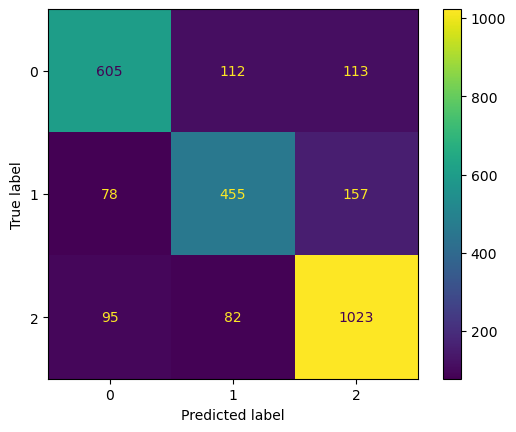

In [29]:
# Confusion Matrix

ConfusionMatrixDisplay.from_estimator(model, x, y)

The confusion matrix shows us how many images from each classes were predicted correctly or incorrectly. We can see that this model performed pretty well in classifying the first and third classes but not as well in classifying leaves with aculus olearius which it mostly classified incorrectly as being healthy. This is expected because as we saw in the pre-processing stage the leaves with aculus olearius look a lot like healthy leaves.

These metrics provide a detailed insight into our model's performance, highlighting strengths such as good recall in class 2 and areas for improvement such as increasing the recall for class 1. 